# Data Extraction

In [ ]:
import scipy.io
data= scipy.io.loadmat('/content/drive/MyDrive/Cse 569/Project_part1/train_data.mat')

print(len(data['x']))
vect1= data['x']
#  print((vect1[0]))
vec=[]

i=0
j= len(vect1)
for k in range(0,12000):
  temp = []
  pic = vect1[k]
  for x in range(len(pic)):
    for y in range(len(pic[x])):
      temp.append(vect1[k][x][y])

  vec.append(temp)


#print((vec))


12000


In [ ]:
print(data['x'].shape)

(12000, 28, 28)


In [ ]:
import pandas as pd
df = pd.DataFrame(vec)
df.head()

<bound method NDFrame.head of        0    1    2    3    4    5    6    7     8      9    ...    774   775  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    0.0  ...   87.0  97.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   2.0    1.0  ...  112.0  83.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...   39.0  28.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...   77.0  61.0   
...    ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...    ...   ...   
11995  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    0.0  ...  123.0  94.0   
11996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0   0.0   
11997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...   51.0  34.0   
11998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  42.0  174.0  ...  138.0  98.0   
11999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  ...   21.0  27.0   

         776   777  778  779  780  781  782  783  
0       51.0   0.0  2.0  0.0  0.0  0.0  0.0  0.0  
1        0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       31.0   5.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      100.0   0.0  0.0  2.0  0.0  0.0  0.0  0.0  
...      ...   ...  ...  ...  ...  ...  ...  ...  
11995   90.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11996    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11997    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11998   89.0  57.0  0.0  0.0  1.0  0.0  0.0  0.0  
11999   12.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[12000 rows x 784 columns]>

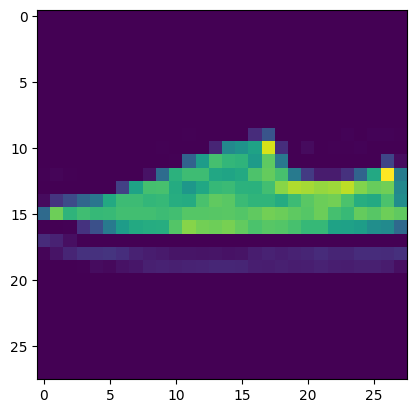

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data['x'][1], interpolation='nearest')
plt.show()

In [ ]:
print(data['y'])
Y=data['y']

[[0 1 0 ... 0 0 0]]


In [ ]:
print(len(vec))

12000


# normalising the data

In [ ]:
import numpy as np
def mean(v):
  sumv= sum(v)
  lenv=len(v)

  return sumv/lenv

def std(v):
  v2=[x**2 for x in v]
  return np.sqrt(mean(v2)-(mean(v))**2)
# mean(vec[0])
# std(vec[0])
def normalize(v):
  m= mean(v)
  s=std(v)
  return [(x-m)/s for x in v]


In [ ]:
def normalisea(vec):
  return [normalize(v) for v in vec]

In [ ]:
import pandas as pd
x= vec
ytrain= data['y']
print(y)
print(len(ytrain))
print(len(x))
print(ytrain.shape)


27
1
12000
(1, 12000)


PCA on data

In [ ]:
def compute_covariance_matrix(X):
  cov_matrix= np.cov(X.T)
  return cov_matrix

def compute_eigenvectors(cov_matrix):
    # Use numpy's linear algebra package to calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors


def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

def project_data(X, sorted_eigenvectors, num_components):
    # Project the data onto the new feature space
    X_projected = np.dot(X, sorted_eigenvectors[:, :num_components])
    return X_projected

In [ ]:
def pca(X, num_components):
    # Step 1: Standardize the data
    X_standardized = normalisea(X)

    X_standardized = np.array(X_standardized)


    # Step 2: Compute the covariance matrix
    cov_matrix = compute_covariance_matrix(X_standardized)

    # Step 3: Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = compute_eigenvectors(cov_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors)

    # Step 5: Project the data onto the new feature space
    X_projected = project_data(X_standardized, sorted_eigenvectors, num_components)

    return X_projected, sorted_eigenvalues, sorted_eigenvectors


In [ ]:
p=pca(vec,500)[0]

In [ ]:
for label in np.unique(ytrain):
        # Create mask to select rows corresponding to the current class (label)
        mask = (ytrain == label)
print(mask)
# now create a mask where true == false
for lable in np.unique(ytrain):
   maskn= np.invert(ytrain==lable)
print(maskn)

[[False  True False ... False False False]]
[[ True False  True ...  True  True  True]]


In [ ]:

print((p[:,0]))

[ 18.24944613 -15.37632276  16.10971256 ...  10.27873245  17.38418665
  12.20159732]


In [ ]:
print(p.shape)

(12000, 2)


In [ ]:
# p1=p[y==0]
# print(p1.shape)
# p2=p[:,1]

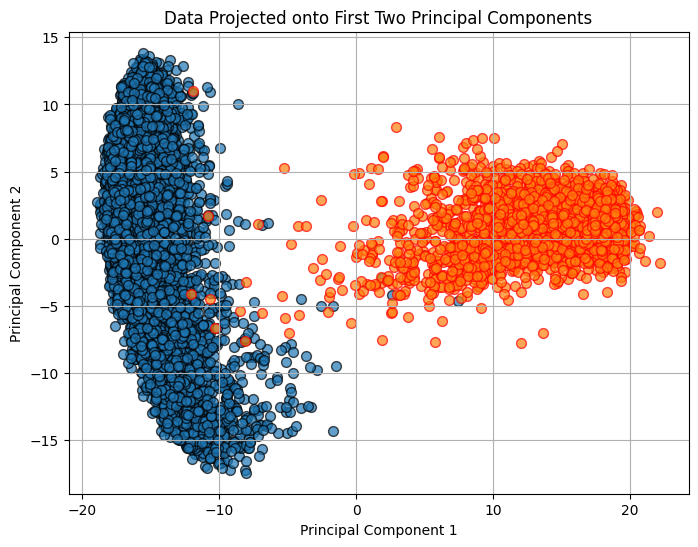

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(p[mask[0],0], p[mask[0],1], edgecolor='k', s=50, alpha=0.7)
plt.scatter(p[maskn[0],0], p[maskn[0],1], edgecolor='r', s=50, alpha=0.7)
plt.title('Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Load test Data

2000
2000
2000
(2000, 784)


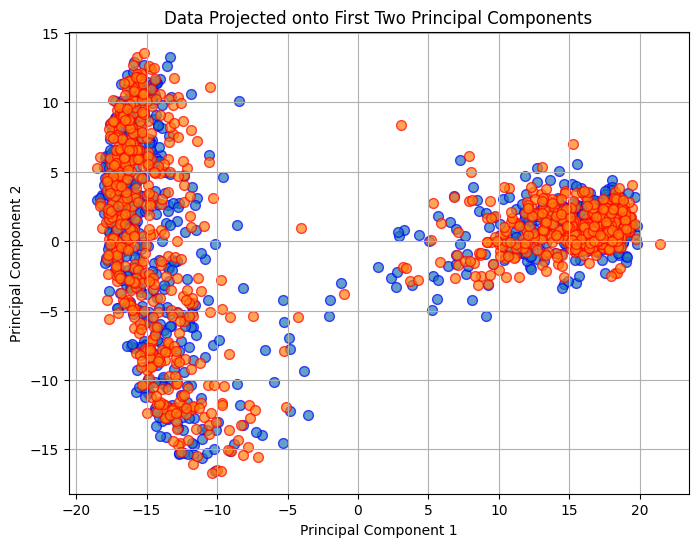

In [ ]:
import scipy

import scipy.io
# data= scipy.io.loadmat('/content/drive/MyDrive/Cse 569/Project_part1/train_data.mat')
# print(len(data['x']))
# vect1= data['x']
# print((vect1[0]))
# vec=[]

# i=0
# j= len(vect1)
# for k in range(0,12000):
#   temp = []
#   pic = vect1[k]
#   for x in range(len(pic)):
#     for y in range(len(pic[x])):
#       temp.append(vect1[k][x][y])

#   vec.append(temp)


#print((vec))
tvec=[]
t_data= scipy.io.loadmat('/content/drive/MyDrive/Cse 569/Project_part1/test_data.mat')
tvect1= t_data['x']
for k in range(0,len(tvect1)):
  temp = []
  pic = vect1[k]
  for x in range(len(pic)):
    for y in range(len(pic[x])):
      temp.append(vect1[k][x][y])

  tvec.append(temp)

yt= t_data['y']
print(len(yt[0]))
for label in np.unique(yt):
        # Create mask to select rows corresponding to the current class (label)
        maskt = (yt == label)
print(len(maskt[0]))

for label in np.unique(yt):
        # Create mask to select rows corresponding to the current class (label)
        masknt = (yt != label)
print(len(masknt[0]))

xt_pca= pca(tvec,784)[0]
xt_pca=np.array(xt_pca)
xt_pca=xt_pca.real
print(xt_pca.shape)

plt.figure(figsize=(8, 6))
plt.scatter(xt_pca[maskt[0],0], xt_pca[maskt[0],1], edgecolor='b', s=50, alpha=0.7)
plt.scatter(xt_pca[masknt[0],0], xt_pca[masknt[0],1], edgecolor='r', s=50, alpha=0.7)
plt.title('Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
df=pd.DataFrame(xt_pca)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,18.338410,0.262077,-2.108559,9.346804,-5.150624,-8.385684,7.676229,-3.441494,-1.714979,-0.982544,...,-0.000078,-0.000015,-2.745828e-05,1.638748e-05,-7.830392e-07,-2.807310e-12,1.226674e-11,1.226674e-11,8.544498e-12,-7.203321e-12
1,-15.197729,12.660504,-2.039169,5.932484,-1.965344,0.143288,9.476425,-6.318584,-2.273008,-1.082556,...,-0.000027,-0.000024,-2.800617e-05,2.293024e-05,-1.214310e-06,-5.121015e-12,1.687506e-11,1.687506e-11,1.200329e-11,-1.036904e-11
2,16.235008,0.748607,-6.523822,13.157961,-3.602361,-7.391050,6.016711,-2.259822,-0.255082,-0.218030,...,0.000051,-0.000045,-3.376129e-05,1.262272e-05,-4.539406e-06,3.356794e-12,1.394773e-11,1.394773e-11,7.662482e-12,-8.284345e-12
3,15.587172,-0.294759,1.684308,2.179580,-5.647433,-1.573866,3.249853,0.467686,1.445182,-6.051051,...,-0.000019,-0.000045,-2.422673e-07,2.737175e-05,-4.573487e-06,-1.925536e-12,2.118072e-11,2.118072e-11,1.319789e-11,-1.181982e-11
4,16.774567,-0.127302,0.763081,6.746799,-6.667374,-6.674274,9.718314,-4.747682,-2.064870,-1.939144,...,0.000004,-0.000041,-3.913269e-05,9.162600e-07,-2.508530e-07,2.589734e-12,4.860667e-12,4.860667e-12,2.507994e-12,-3.718609e-12


In [ ]:
print(y)
print(p)

27
[[ 1.82494461e+01  3.16029544e-01 -2.35295089e+00 ...  4.89252212e+00
  -3.13713593e+00  1.41049738e-02]
 [-1.53763228e+01  1.23011214e+01 -2.50453420e+00 ...  7.22975497e+00
  -3.77305041e+00 -1.13334288e+00]
 [ 1.61097126e+01  8.02440689e-01 -7.02946098e+00 ...  3.98202945e+00
  -1.66990455e+00  1.74671566e-01]
 ...
 [ 1.02787325e+01 -4.64407758e-01 -2.76830856e+00 ... -2.00891319e+00
   1.46699589e+00 -1.44965390e+00]
 [ 1.73841866e+01  1.94700854e+00 -7.84933737e+00 ...  4.97780287e+00
   6.93097123e-02 -6.08641742e+00]
 [ 1.22015973e+01  1.12008478e+00  4.44043212e+00 ... -3.32471010e-02
  -4.06337095e-01  5.61382004e-01]]


In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on each PCA component
stat, p_value = shapiro(xt_pca[:, 0])  # Test for PC1
print("PC1 Shapiro-Wilk test p-value:", p_value)

stat, p_value = shapiro(xt_pca[:, 1])  # Test for PC2
print("PC2 Shapiro-Wilk test p-value:", p_value)

PC1 Shapiro-Wilk test p-value: 9.92754410364318e-47
PC2 Shapiro-Wilk test p-value: 1.7269003527060637e-28


In [ ]:
def estimate_parameters(X, y):
    means = {}
    covariances = {}

    for label in np.unique(y):
        print(label)
        # Select the samples belonging to the current class
        class_samples = X[y == label]

        # Calculate mean and covariance for this class
        mean_vector = np.mean(class_samples, axis=0)
        covariance_matrix = np.cov(class_samples, rowvar=False)

        means[label] = mean_vector
        covariances[label] = covariance_matrix

        # print(f'Class {label} - Mean: {mean_vector}, Covariance: {covariance_matrix}')

    return means, covariances

# Estimate parameters for the training data
print(p[:,0])
print(ytrain[0])
means, covariances = estimate_parameters(p[:,0], ytrain[0])
meant, covariancet = estimate_parameters(xt_pca[:,0], yt[0])

# Output the estimated parameters
print("train Means:", means)
print("train Covariances:", covariances)
print("test Means:", meant)
print("test Covariances:", covariancet)

[ 18.24944613 -15.37632276  16.10971256 ...  10.27873245  17.38418665
  12.20159732]
[0 1 0 ... 0 0 0]
0
1
0
1
train Means: {0: 15.059637201889078, 1: -15.132393298263366}
train Covariances: {0: array(15.06446466), 1: array(5.51462828)}
test Means: {0: 0.3293546113406989, 1: 0.21167897168514554}
test Covariances: {0: array(237.00679219), 1: array(237.16614881)}


In [ ]:
from scipy.stats import multivariate_normal
def classify(X, means, covariances):
    predictions = []

    for sample in X:
        # Calculate the probability for each class
        probabilities = {}
        for label in means.keys():
            # Compute the PDF of the multivariate Gaussian distribution
            probabilities[label] = multivariate_normal.pdf(sample, mean=means[label], cov=covariances[label])

        # Classify based on the maximum probability
        predicted_class = max(probabilities, key=probabilities.get)
        predictions.append(predicted_class)
    # print(predictions)
    return np.array(predictions)

In [ ]:
# Step 5: Make predictions for the training and testing data
y_train_pred = classify(p[:,0], means, covariances)
y_test_pred = classify(xt_pca[:,0], meant, covariancet)
# print(y_test_pred)
# print(y_train_pred)
# print(y)
# print(len(y_train_pred))
# print(len(y_test_pred))
# print(len(yt))

# Step 6: Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

train_accuracy = calculate_accuracy(ytrain[0], y_train_pred)
test_accuracy = calculate_accuracy(yt[0], y_test_pred)
# Output the accuracies
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 99.76%
Testing Accuracy: 50.10%
